          Country                           Region  Happiness Rank  \
0     Switzerland                   Western Europe               1   
1         Iceland                   Western Europe               2   
2         Denmark                   Western Europe               3   
3          Norway                   Western Europe               4   
4          Canada                    North America               5   
5         Finland                   Western Europe               6   
6     Netherlands                   Western Europe               7   
7          Sweden                   Western Europe               8   
8     New Zealand        Australia and New Zealand               9   
9       Australia        Australia and New Zealand              10   
10         Israel  Middle East and Northern Africa              11   
11     Costa Rica      Latin America and Caribbean              12   
12        Austria                   Western Europe              13   
13         Mexico   

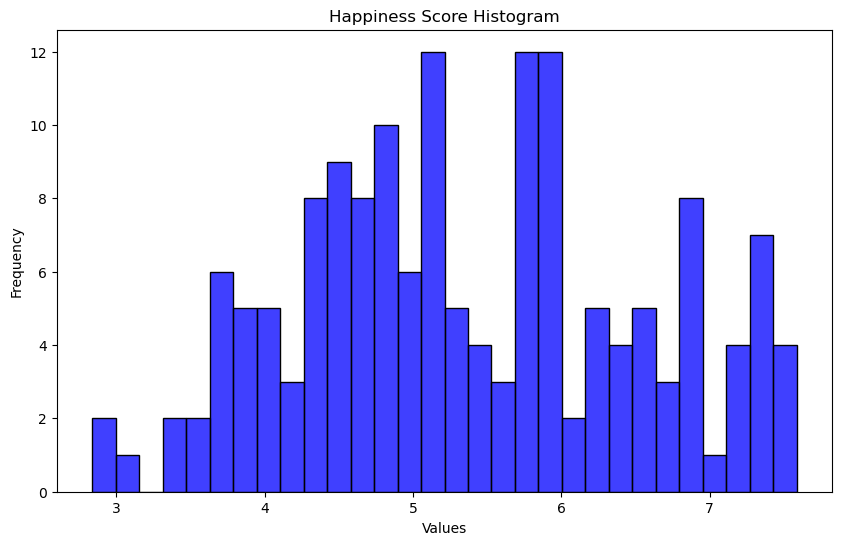

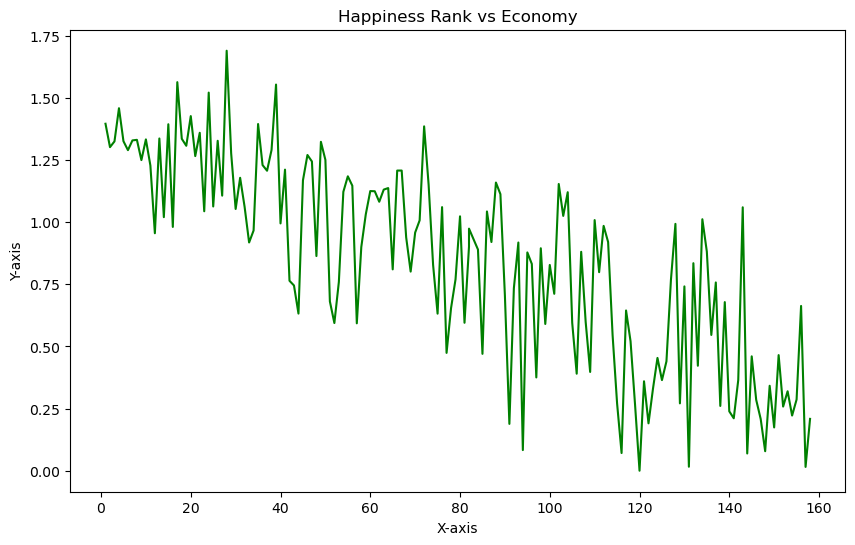

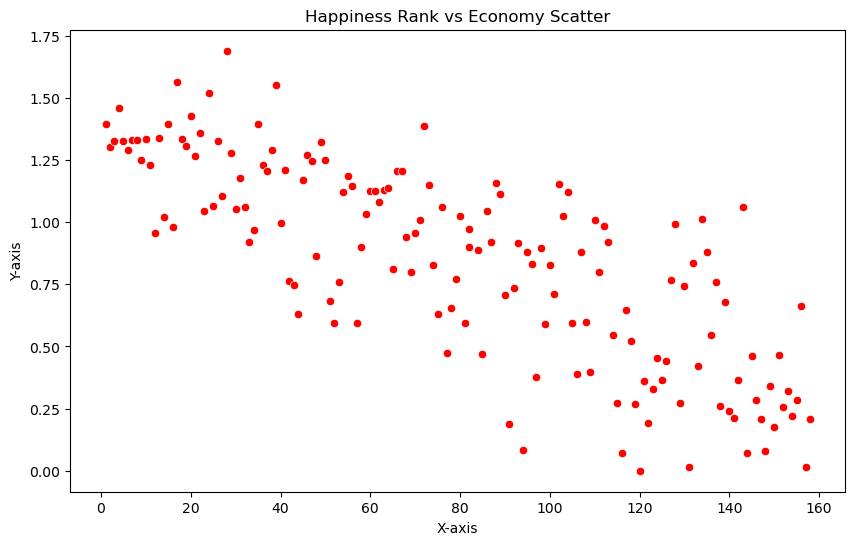

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from data_loader import DataLoader
from data_analysis import DataAnalyzer
from visualization import DataVisualizer
from my_logging import setup_logging
from save import save_to_csv, save_to_json

# Настройка логгирования
setup_logging()

if __name__ == "__main__":
    loader = DataLoader()
    
    # Загрузка данных из CSV
    csv_data = loader.load_from_csv('data/2015.csv')
    
    if csv_data is None:
        print("Не удалось загрузить данные из CSV.")
        exit(1)  # Завершение программы с кодом ошибки

    # Создание экземпляра анализатора
    analyzer = DataAnalyzer(csv_data)
    print(csv_data.head(15))    #вывести первые несколько строк загруженного DataFrame

     #Анализ типов данных
    data_types = analyzer.analyze_data_types()
    print("Типы данных в DataFrame:\n", data_types) 

    # Подсчет и отчет о пропущенных значениях
    missing_report = analyzer.report_missing_values()
    print("Пропущенные значения по столбцам:\n", missing_report)

    
    
    # Проверка, есть ли пропущенные значения
    if missing_report.empty:
        print("Пропущенных значений нет.")
    else:
        print("Пропущенные значения найдены.") 

    # Дополнительные проверки
    missing_counts = csv_data.isnull().sum()
    print("Пропущенные значения по столбцам (через isnull):\n", missing_counts)

    empty_strings = (csv_data == '').sum()
    print("Пустые строки по столбцам:\n", empty_strings)

    null_values = (csv_data == 'NULL').sum()
    print("Значения 'NULL' по столбцам:\n", null_values)

    # Получение статистического описания данных
    description = analyzer.describe_data()
    print("Статистическое описание данных:\n", description)
    
    # Сохраняем статистическое описание в CSV
    save_to_csv(description.reset_index().to_dict(orient="records"), "output_data/output_description.csv")
    
    #plt.figure(figsize=(10, 6))
    #sns.heatmap(csv_data.isnull(), cbar=False, cmap='viridis')
    #plt.title('Тепловая карта пропущенных значений')
    #plt.show()

    #Заполнение пропущенных значений средним значением
    analyzer.fill_missing_values(strategy='mean')
    print("Пропущенные значения после заполнения:\n", analyzer.report_missing_values())

    # Сохраняем очищенные данные в CSV
    save_to_csv(analyzer.data.to_dict(orient="records"), "output_data/output_cleaned_data.csv")

    # Удаление строк с пропущенными значениями
    if missing_counts.sum() > 0:
        analyzer.drop_missing_values()
        print("Данные после удаления строк с пропущенными значениями:\n", analyzer.data.head(15))
        # Сохраняем данные после удаления строк с пропущенными значениями
        save_to_csv(analyzer.data.to_dict(orient="records"), "output_no_missing_data.csv")
    else:
        print("Пропущенных значений нет, удаление строк не требуется.")

    # Визуализация
    visualizer = DataVisualizer(analyzer.data)
    try:
        visualizer.plot_histogram('Happiness Score', color='blue', title='Happiness Score Histogram')
        visualizer.plot_line(x_column='Happiness Rank', y_column='Economy (GDP per Capita)', color='green', title='Happiness Rank vs Economy')
        visualizer.plot_scatter(x_column='Happiness Rank', y_column='Economy (GDP per Capita)', color='red', title='Happiness Rank vs Economy Scatter')
    except KeyError as e:
        logging.error(f"Ошибка: столбец {e} не найден в DataFrame.")